✨ **Welcome to Hotel Reservation Portfolio!** ✨  

Ever wondered what hotel booking data can reveal about guest habits and preferences? 🏨💼 In this project, I explored a rich dataset from Kaggle, uncovering stories about room types, guest counts, booking times, and even meal preferences. From discovering which room is most loved by families with kids 👨‍👩‍👧‍👦 to analyzing the busiest months for reservations 📅, this analysis dives deep into the fascinating details behind hotel stays.  

To ensure the data was in tip-top shape 🛠️, I put on my data wrangling hat 🎩 and checked missing values, duplicates, and messy formats, transforming the dataset into a clean and readable masterpiece. Then came the fun part—Exploratory Data Analysis (EDA) 🔍—where I unearthed trends, correlations, and intriguing patterns.

Through thoughtful questions and creative insights, I turned rows of numbers into a captivating narrative. Curious about which room repeat guests love most 💖 or what correlates most with booking status 📊? You’re in the right place. Let’s dive into the story this dataset has to tell! 🚀

# Gathering Data

Data Source : https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# hotel_reservation_df = pd.read_csv('/Users/anakagungngurahanandasuryawedhana/Documents/learning material/DS/surya-wedhana-data-analysis-portofolio/Hotel Reservations.csv')
hotel_reservation_df = pd.read_csv('/content/Hotel Reservations.csv')
hotel_reservation_df.head(5)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Column Info:

1. Booking_ID: unique identifier of each booking
2. no_of_adults: Number of adults
3. no_of_children: Number of Children
4. no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
5. no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
6. type_of_meal_plan: Type of meal plan booked by the customer:
7. required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
8. room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
9. lead_time: Number of days between the date of booking and the arrival date
10. arrival_year: Year of arrival date
11. arrival_month: Month of arrival date
12. arrival_date: Date of the month
13. market_segment_type: Market segment designation.
14. repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
15. no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
16. no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
17. avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
18. no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
19. booking_status: Flag indicating if the booking was canceled or not.

# Data Wrangling

In [ ]:
hotel_reservation_df.info()

# From the .info() function confirms that there are no missing values and no incorrect data formats in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
print(hotel_reservation_df.duplicated().sum())

# This code confirms that there are no duplicate values in the dataset.

0


In [ ]:
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
    6: 'June', 7: 'July', 8: 'August', 9: 'September',
    10: 'October', 11: 'November', 12: 'December'
}

# Replace numeric months with text
hotel_reservation_df['arrival_month'] = hotel_reservation_df['arrival_month'].replace(month_mapping)
hotel_reservation_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,October,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,November,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,February,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,May,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,April,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,August,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,October,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,July,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,April,21,Online,0,0,0,94.50,0,Canceled


In [ ]:
hotel_reservation_df['booking_status'] = hotel_reservation_df['booking_status'].replace({
    'Not_Canceled' : 'Not Cancelled',
    'Canceled' : 'Cancelled'
})

# This code standardizes the values in the 'booking_status' column of the DataFrame by replacing:
# - 'Not_Canceled' with 'Not Cancelled' to correct the spelling and formatting for consistency.
# - 'Canceled' with 'Cancelled' to match British English spelling.

In [ ]:
hotel_reservation_df['room_type_reserved'] = hotel_reservation_df['room_type_reserved'].replace({
    'Room_Type 1' : 'Room Type 1',
    'Room_Type 2' : 'Room Type 2',
    'Room_Type 3' : 'Room Type 3',
    'Room_Type 4' : 'Room Type 4',
    'Room_Type 5' : 'Room Type 5',
    'Room_Type 6' : 'Room Type 6',
    'Room_Type 7' : 'Room Type 7',
})

# This code standardizes the values in the 'room_type_reserved' column of the DataFrame by:
# - Replacing underscores (_) with spaces in room type names (e.g., 'Room_Type 1' to 'Room Type 1').
# - Ensuring consistency and better readability across all room type entries.

In [ ]:
hotel_reservation_df['required_car_parking_space'] = hotel_reservation_df['required_car_parking_space'].replace({
    0 : 'No',
    1 : 'Yes'
})

# This code standardizes the values in the 'required_car_parking_space' column of the DataFrame by:
# - Replacing Number 0 and 1 into 0 -> No and 1 -> Yes .

In [ ]:
hotel_reservation_df['repeated_guest'] = hotel_reservation_df['repeated_guest'].replace({
    0 : 'No',
    1 : 'Yes'
})

# This code standardizes the values in the 'repeated_guest' column of the DataFrame by:
# - Replacing Number 0 and 1 into 0 -> No and 1 -> Yes .

# EDA

In [ ]:
hotel_reservation_df.describe(include = 'all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275,36275,36275.000000,36275.000000,36275,36275.000000,36275,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,2,7,NaN,NaN,12,NaN,5,2,NaN,NaN,NaN,NaN,2
top,INN36275,NaN,NaN,NaN,NaN,Meal Plan 1,No,Room Type 1,NaN,NaN,October,NaN,Online,No,NaN,NaN,NaN,NaN,Not Cancelled
freq,1,NaN,NaN,NaN,NaN,27835,35151,28130,NaN,NaN,5317,NaN,23214,35345,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,NaN,NaN,85.232557,2017.820427,NaN,15.596995,NaN,NaN,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,NaN,NaN,85.930817,0.383836,NaN,8.740447,NaN,NaN,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,2017.000000,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,17.000000,2018.000000,NaN,8.000000,NaN,NaN,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,NaN,NaN,57.000000,2018.000000,NaN,16.000000,NaN,NaN,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,NaN,NaN,126.000000,2018.000000,NaN,23.000000,NaN,NaN,0.000000,0.000000,120.000000,1.000000,NaN


Key Insights from the Dataset

1. The dataset contains **36,275 rows**.  
2. The maximum number of **adults reserving a room** is **4 individuals**.  
3. The maximum number of **children reserving a room** is **10 individuals**.  
4. The most frequently ordered meal type is **Meal Plan 1**.  
5. The most commonly reserved room type is **Room Type 1**.  
6. The farthest reservation made in advance is **443 days before the due date**.  
7. The highest number of **special requests** received by the hotel is **5 requests**.  
8. The most common **booking status** is **Not Canceled**.
9. The highest number of customers visiting the hotel is in **October**.
10. This dataset contains customer reservation data from **2017 to 2018**.
11. Most of the customer **no need car parking space**

In [ ]:
# For Correlation Calculation
hotel_reservation_with_cancel_booking_df = hotel_reservation_df

hotel_reservation_df = hotel_reservation_df[hotel_reservation_df['no_of_adults'] != 0]
hotel_reservation_df = hotel_reservation_df[hotel_reservation_df['booking_status'] != 'Cancelled']
# only include hotel reservation with adult

In [ ]:
hotel_reservation_with_cancel_booking_df.to_excel('hotel_reservation_with_cancel_booking_df.xlsx')

In [ ]:
hotel_reservation_df['has_children'] = hotel_reservation_df['no_of_children'].apply(lambda x: 'yes' if x > 0 else 'no')
# make a new column that check wheter the reservation including kid or not

In [ ]:
has_children_df = hotel_reservation_df.groupby(by='has_children').Booking_ID.nunique().sort_values(ascending=False).reset_index()
has_children_df.columns = ['has_children','number_of_reservation']
has_children_df

,has_children,number_of_reservation
0,no,22695
1,yes,1600


**Reservations with Children**

According to the reservation data:  
- **22,695 reservations** were made **without** bringing children.  
- Only **1,600 reservations** included children.  

This indicates that the majority of reservations were made without children.


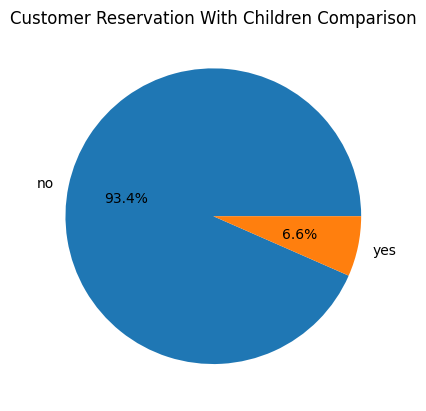

In [ ]:
# comparing customer with children and no children
plt.pie(
    x = has_children_df['number_of_reservation'],
    labels = has_children_df['has_children'],
    autopct = '%1.1f%%',
)
plt.title('Customer Reservation With Children Comparison')
plt.show()

In [ ]:
required_car_parking_space_df = hotel_reservation_df.groupby(by='required_car_parking_space').Booking_ID.nunique().sort_values(ascending=False).reset_index()
required_car_parking_space_df.columns = ['required_car_parking_space_df','number_of_reservation']
required_car_parking_space_df

,required_car_parking_space_df,number_of_reservation
0,No,23286
1,Yes,1009


**Car Parking Space**  

According to the reservation data:  
- The majority of customers (**93.4%**, or **23,286 reservations**) do **not** require a car parking space.  
- Only **6.6%** (or **1,009 reservations**) require a car parking space.  

This shows that the demand for car parking space is relatively low compared to the total reservations.

In [ ]:
hotel_reservation_df['no_of_peoples'] = hotel_reservation_df['no_of_adults'] + hotel_reservation_df['no_of_children']

In [ ]:
room_type_reserved_df = hotel_reservation_df.groupby(by='room_type_reserved').Booking_ID.nunique().sort_values(ascending=False).reset_index()
room_type_reserved_df.columns = ['room_type_reserved','number_of_reservation']
room_type_reserved_df

,room_type_reserved,number_of_reservation
0,Room Type 1,19056
1,Room Type 4,3988
2,Room Type 6,558
3,Room Type 2,374
4,Room Type 5,193
5,Room Type 7,121
6,Room Type 3,5


**Room Type Reservations**  

According to the Room Type Table:  
- **Room Type 1** is the most reserved room, with **19,056 reservations**.  
- The second most reserved room has only **3,988 reservations**, which is nearly **twice as few** as Room Type 1.  
- The least reserved room is **Room Type 3**, with only **5 reservations** across the entire dataset.  

This shows a significant disparity in reservation numbers across different room types.

In [ ]:
booking_status_df = hotel_reservation_with_cancel_booking_df.groupby(by='booking_status').Booking_ID.nunique().sort_values(ascending=False).reset_index()
booking_status_df.columns = ['booking_status','number_of_reservation']
booking_status_df

,booking_status,number_of_reservation
0,Not Cancelled,24390
1,Cancelled,11885


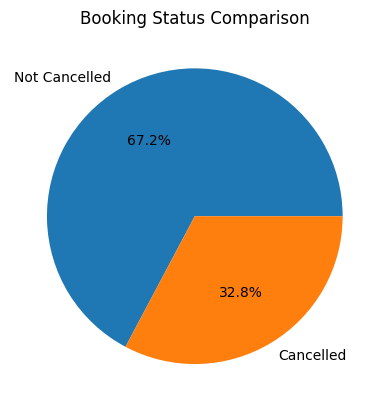

In [ ]:
plt.pie(
    x = booking_status_df['number_of_reservation'],
    labels = booking_status_df['booking_status'],
    autopct = '%1.1f%%',
)
plt.title('Booking Status Comparison')
plt.show()

**Hotel Reservation Status**

According to the table and the booking status pie chart:  
- **Not cancelled** reservations account for **24,390** reservations, or **67.8%** of the total data.  
- **Cancelled** reservations make up **11,885** reservations, or **32.8%** of the total data.  

This indicates that the majority of hotel reservations are not cancelled.  

# Questions:

 ## **Room Preferences for Families:** Which type of room is most commonly reserved by customers bringing children?  

In [ ]:
hotel_reservation_only_bring_children_df = hotel_reservation_df[hotel_reservation_df['has_children'] == 'yes']
hotel_reservation_only_bring_children_df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,has_children,no_of_peoples
60,INN00061,2,2,0,1,Meal Plan 1,Yes,Room Type 6,2,2018,...,2,Online,No,0,0,258.00,1,Not Cancelled,yes,4
95,INN00096,2,1,0,2,Meal Plan 1,Yes,Room Type 1,134,2018,...,4,Online,No,0,0,130.50,2,Not Cancelled,yes,3
99,INN00100,2,2,1,3,Meal Plan 1,No,Room Type 6,30,2018,...,22,Online,No,0,0,156.90,0,Not Cancelled,yes,4
117,INN00118,2,1,2,5,Meal Plan 1,No,Room Type 1,105,2018,...,12,Online,No,0,0,102.83,3,Not Cancelled,yes,3
169,INN00170,2,1,1,0,Not Selected,No,Room Type 1,11,2017,...,13,Online,No,0,0,87.40,1,Not Cancelled,yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36149,INN36150,2,2,0,3,Meal Plan 1,No,Room Type 2,166,2018,...,21,Online,No,0,0,73.60,2,Not Cancelled,yes,4
36184,INN36185,2,1,2,0,Meal Plan 1,No,Room Type 1,16,2018,...,4,Online,No,0,0,118.80,1,Not Cancelled,yes,3
36221,INN36222,2,2,2,4,Meal Plan 1,No,Room Type 6,62,2018,...,24,Online,No,0,0,207.90,1,Not Cancelled,yes,4
36227,INN36228,2,2,0,1,Meal Plan 1,No,Room Type 6,20,2018,...,6,Online,No,0,0,231.00,1,Not Cancelled,yes,4


In [ ]:
room_type_with_kids = hotel_reservation_only_bring_children_df.groupby(by='room_type_reserved').Booking_ID.nunique().reset_index()
room_type_with_kids.columns = ['room_type_reserved','number_of_reservation']
room_type_with_kids

,room_type_reserved,number_of_reservation
0,Room Type 1,874
1,Room Type 2,43
2,Room Type 4,155
3,Room Type 5,19
4,Room Type 6,466
5,Room Type 7,43


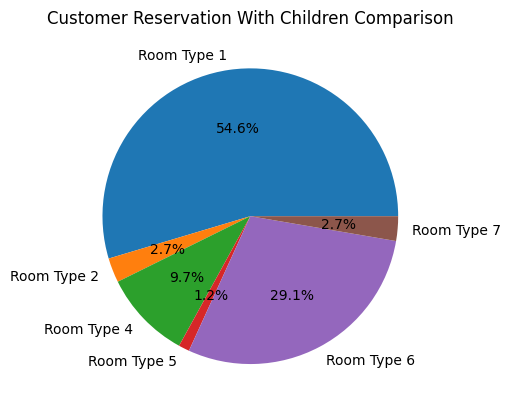

In [ ]:
# comparing customer with children and no children
plt.pie(
    x = room_type_with_kids['number_of_reservation'],
    labels = room_type_with_kids['room_type_reserved'],
    autopct = '%1.1f%%',
)
plt.title('Customer Reservation With Children Comparison')
plt.show()

**Room Preferences for Customers with Children**

- The most reserved room type by customers bringing children is **Room Type 1**, accounting for **54.6%** of all bookings.  
- The second most reserved room type is **Room Type 6**, accounting for **29.1%** of all bookings.

## **Occupancy Trends:** What is the total number of people (adults and children combined) typically included in a single room reservation?

In [ ]:
number_of_peoples_df = hotel_reservation_df.groupby(by='no_of_peoples').Booking_ID.nunique().sort_values(ascending=False).reset_index()
number_of_peoples_df.columns = ['no_of_peoples','number_of_reservation']
number_of_peoples_df['no_of_peoples'] = number_of_peoples_df['no_of_peoples'].astype(str)

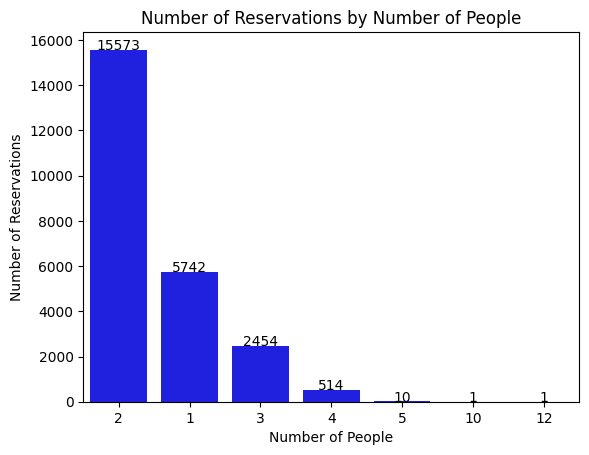

In [ ]:
# Create the bar plot
sns.barplot(
    y=number_of_peoples_df['number_of_reservation'],
    x=number_of_peoples_df['no_of_peoples'],
    orient='v',
    color='blue'
)

# Add labels to each bar
for index, value in enumerate(number_of_peoples_df['number_of_reservation']):
    plt.text(
        x=index,
        y=value + 0.5,  # Adjust the position slightly above the bar
        s=str(value),  # Convert value to string for display
        ha='center'   # Center-align the text
    )

# Add labels and title
plt.xlabel('Number of People')
plt.ylabel('Number of Reservations')
plt.title('Number of Reservations by Number of People')

# Show the plot
plt.show()

**Common Group Size for Hotel Reservations**

- Based on the bar chart, the most common group size for hotel reservations is **2 people**.  
- The data shows **15,573 reservations** were made for **2 people in a single room**.

## **Monthly Reservation Patterns:** How many reservations are made in each month throughout the dataset?

In [ ]:
monthy_reservation = hotel_reservation_df.groupby(by='arrival_month').Booking_ID.nunique().sort_values(ascending=False).reset_index()
monthy_reservation.columns = ['arrival_month','number_of_reservation']
monthy_reservation

,arrival_month,number_of_reservation
0,October,3423
1,September,3067
2,December,2603
3,August,2311
4,November,2103
5,June,1906
6,April,1734
7,March,1654
8,May,1645
9,July,1602


**Monthly Booking Trends**

- According to the table, the **highest number of bookings** occurred in **October**, with **3,423 bookings**.  
- The **second highest number of bookings** occurred in **September**, with **3,067 bookings**.
- The **third highest number of bookings** occurred in **December**, with **2,603 bookings**.

## **Repeat Guest Preferences:** Which type of room is most frequently reserved by repeat guests?  

In [ ]:
repeated_guest_df = hotel_reservation_df[hotel_reservation_df['repeated_guest']=='Yes']

In [ ]:
repeated_guest_groupby_df = repeated_guest_df.groupby(by='room_type_reserved').Booking_ID.nunique().reset_index()

In [ ]:
repeated_guest_groupby_df.columns = ['room_type_reserved','number_of_reservation']
repeated_guest_groupby_df

,room_type_reserved,number_of_reservation
0,Room Type 1,793
1,Room Type 2,7
2,Room Type 4,67
3,Room Type 5,16
4,Room Type 6,10
5,Room Type 7,21


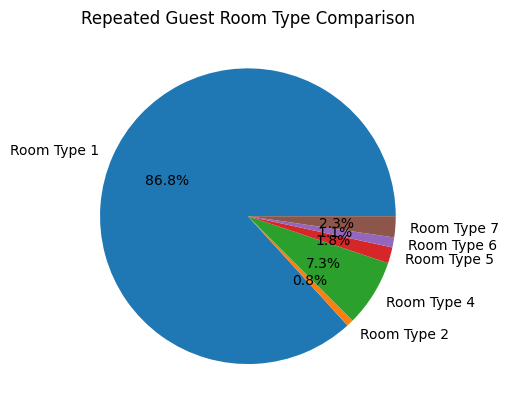

In [ ]:
plt.pie(
    x = repeated_guest_groupby_df['number_of_reservation'],
    labels = repeated_guest_groupby_df['room_type_reserved'],
    autopct = '%1.1f%%',
)
plt.title('Repeated Guest Room Type Comparison')
plt.show()

**Room Preferences of Repeat Guests**

1. **Repeated guests** most commonly reserve **Room Type 1**, accounting for **86.8%** of all booking data.  
2. The second most reserved room type by repeated guests is **Room Type 4**, with **7.3%** of all booking data.

## **Cancellation Analysis by Room Type:** Which room type experiences the highest number of cancellations and successful bookings?

In [ ]:
hotel_reservation_with_cancel_booking_df.groupby(by=['room_type_reserved', 'booking_status']).agg({
    'Booking_ID' : 'count'
})

Booking_ID
room_type_reserved booking_status            
Room Type 1        Cancelled             9072
                   Not Cancelled        19058
Room Type 2        Cancelled              228
                   Not Cancelled          464
Room Type 3        Cancelled                2
                   Not Cancelled            5
Room Type 4        Cancelled             2069
                   Not Cancelled         3988
Room Type 5        Cancelled               72
                   Not Cancelled          193
Room Type 6        Cancelled              406
                   Not Cancelled          560
Room Type 7        Cancelled               36
                   Not Cancelled          122

**Booking Status by Room Type**

- From the table above, **Room Type 1** has the highest number of cancellations, with **9,072 bookings cancelled**.  
- Additionally, **Room Type 1** also has the highest number of non-cancelled bookings, with **19,058 bookings not cancelled**.

## **Special Requests by Room Type:** Which room type receives the highest number of special requests?  

In [ ]:
hotel_reservation_with_cancel_booking_df.groupby(by=['room_type_reserved']).agg({
    'no_of_special_requests' : 'sum'
})

,no_of_special_requests
room_type_reserved,
Room Type 1,15691
Room Type 2,527
Room Type 3,1
Room Type 4,5102
Room Type 5,89
Room Type 6,874
Room Type 7,194


**Special Requests by Room Type**

- From the table above, **Room Type 1** has the highest number of special requests, with **15,691 special requests**.  
- **Room Type 3** has the lowest number of special requests among all room types.

## **Correlation Analysis:** Is there any column in the dataset that shows the highest correlation with the booking status?  

In [ ]:
hotel_reservation_with_cancel_booking_df.iloc[:,1:-1].columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [ ]:
import scipy.stats
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
hotel_reservation_with_cancel_booking_df['type_of_meal_plan']= label_encoder.fit_transform(hotel_reservation_with_cancel_booking_df['type_of_meal_plan'])
hotel_reservation_with_cancel_booking_df['required_car_parking_space']= label_encoder.fit_transform(hotel_reservation_with_cancel_booking_df['required_car_parking_space'])
hotel_reservation_with_cancel_booking_df['room_type_reserved']= label_encoder.fit_transform(hotel_reservation_with_cancel_booking_df['room_type_reserved'])
hotel_reservation_with_cancel_booking_df['market_segment_type']= label_encoder.fit_transform(hotel_reservation_with_cancel_booking_df['market_segment_type'])
hotel_reservation_with_cancel_booking_df['repeated_guest']= label_encoder.fit_transform(hotel_reservation_with_cancel_booking_df['repeated_guest'])
hotel_reservation_with_cancel_booking_df['arrival_month']= label_encoder.fit_transform(hotel_reservation_with_cancel_booking_df['arrival_month'])

correlation_columns = hotel_reservation_with_cancel_booking_df.iloc[:,1:-1].columns
correlation_value = []
for column in correlation_columns:
    correlation_value.append(scipy.stats.spearmanr(hotel_reservation_with_cancel_booking_df[column], hotel_reservation_with_cancel_booking_df['booking_status'])[0])

correlation_data = {'columns_name': hotel_reservation_with_cancel_booking_df.iloc[:,1:-1].columns,
        'dependent_correlation': correlation_value}

correlation_table = pd.DataFrame(correlation_data)

correlation_table.sort_values(by='dependent_correlation', ascending=False).head(3)

,columns_name,dependent_correlation
16,no_of_special_requests,0.256290
12,repeated_guest,0.107287
14,no_of_previous_bookings_not_canceled,0.102856


**Booking Status and Correlation Analysis**  

- Using the **Spearman correlation method**, the **number of special requests** has the **highest correlation** with booking status, with a correlation coefficient of **0.256**.  
- A positive correlation (**0.256**) suggests that as the number of special requests increases, the booking status (e.g., confirmed or canceled) tends to move in the same direction.  
- The value indicates a **weak to moderate positive relationship**, meaning there is some connection but not a strong one. This shows that while special requests may influence booking status, other factors likely play a more significant role.  

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

hotel_reservation_with_cancel_booking_df['booking_status'] = label_encoder.fit_transform(hotel_reservation_with_cancel_booking_df['booking_status'])
numerical_columns = hotel_reservation_with_cancel_booking_df[['no_of_adults','no_of_children','lead_time','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests']]


from scipy.stats import pointbiserialr

correlations = []
for column in numerical_columns:
  correlation, p_value = pointbiserialr(hotel_reservation_with_cancel_booking_df[column], hotel_reservation_with_cancel_booking_df['booking_status'])
  correlations.append(correlation)

data = {
    'numerical_columns': numerical_columns.columns,
    'correlations': correlations
}
numerical_columns_correlations = pd.DataFrame(data)
numerical_columns_correlations.sort_values(by='correlations', ascending=False)

,numerical_columns,correlations
6,no_of_special_requests,0.253070
4,no_of_previous_bookings_not_canceled,0.060179
3,no_of_previous_cancellations,0.033728
1,no_of_children,-0.033078
0,no_of_adults,-0.086920
5,avg_price_per_room,-0.142569
2,lead_time,-0.438538


**Correlation Analysis**

Using **point-biserial correlation** to measure the relationship between a numerical and a categorical variable (booking status: *cancelled* vs. *not cancelled*), the analysis revealed that the **number of special requests** has the strongest correlation with booking status. The correlation coefficient is **0.253**, indicating a **positive but weak** relationship — bookings with more special requests are slightly less likely to be cancelled.


# **Insights**

**Hotel Booking Insights Summary**

1. **Room Preferences for Families**

   * **Room Type 1** is the top choice for guests with children, making up **54.6%** of bookings.
   * **Room Type 6** follows at **29.1%**.

2. **Most Common Group Size**

   * The majority of hotel bookings are for **2 people**, with **15,573 reservations** made for this group size.

3. **Monthly Booking Trends**

   * **October** sees the highest booking volume (**3,423 bookings**), followed by **September** (**3,067**) and **December** (**2,603**).

4. **Room Preferences of Repeat Guests**

   * **Room Type 1** dominates among returning guests, accounting for **86.8%** of repeat bookings.
   * **Room Type 4** is the second most chosen at **7.3%**.

5. **Booking Status by Room Type**

   * **Room Type 1** has the highest **number of cancellations** (**9,072**) and also the highest **number of completed bookings** (**19,058**), indicating its overall popularity.

6. **Special Requests by Room Type**

   * **Room Type 1** receives the most special requests (**15,691**), while **Room Type 3** receives the least.

# **Suggestions to Improve Hotel Performance**

Based on these insights, here are data-driven recommendations for improvement:

1. **Leverage Room Type 1’s Popularity More Strategically**

   * Since Room Type 1 is highly preferred (by families and repeat guests) but also has the most cancellations, consider:

     * Offering **flexible cancellation policies** or **incentives to confirm bookings** (e.g., early check-in or minor upgrades).
     * **Improving the description and photos** to manage expectations and reduce cancellations.

2. **Enhance Services for Families**

   * Given the high percentage of families booking Room Type 1 and Room Type 6, offer **family-focused packages** (e.g., discounts for children's meals, family activity guides, or babysitting services).

3. **Target Repeat Guests**

   * With Room Type 1 being the top choice for repeat customers, consider offering **loyalty perks** for those booking this room type, such as exclusive rates or welcome gifts.

4. **Optimize for Peak Months**

   * Boost staffing and promotions during **October, September, and December**, which are peak booking months.
   * Consider running **early bird promotions** for these months to lock in revenue and reduce last-minute cancellations.

5. **Re-evaluate Room Type 3**

   * With the fewest special requests, Room Type 3 may be under-personalized. Evaluate if its amenities or listing can be improved to increase appeal.